In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import shapiro, anderson, kstest
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [215]:
df_test = pd.read_csv('./doc/test.csv', sep=';')

# General
df_test.rename(columns={'Informazioni cronologiche': 'TIME_INFO'}, inplace=True)
df_test.rename(columns={'1.Da quale scuola provieni': 'SCUOLA'}, inplace=True)
df_test.rename(columns={'2.Quale classe frequenti': 'CLASSE'}, inplace=True)
df_test.rename(columns={'3.Età': 'ETA'}, inplace=True)
df_test.rename(columns={'4.Genere': 'GENERE'}, inplace=True)
df_test.rename(columns={'5.Nazionalità': 'NAZIONALITA'}, inplace=True)

df_test['TIME_INFO'].astype('category')
df_test['SCUOLA'].astype('category')
df_test['CLASSE'].astype('category')
df_test['ETA'].astype('int')
df_test['GENERE'].astype('int')
df_test['NAZIONALITA'].astype('category')

# Fear
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n1. Essere puniti ': '1. Paura (Essere puniti)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n2. Fare una brutta figura  ': '2. Paura (Fare una brutta figura)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n3. Andare in ospedale    ': '3. Paura (Andare in ospedale)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n4. Perdere una persona cara': '4. Paura (Perdere una persona cara)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n5. Ammalarsi ': '5. Paura (Ammalarsi)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n6. Incontrare estranei': '6. Paura (Incontrare estranei)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n7. Guerra': '7. Paura (Guerra)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n8. fare un prelievo/tampone/puntura': '8. Paura (fare un prelievo/tampone/puntura)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n9. Cadere da Luoghi alti': '9. Paura (Cadere da Luoghi alti)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n10. Essere presi in giro': '10. Paura (Essere presi in giro)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n11. Serpenti': '11. Paura (Serpenti)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n12. Ladri': '12. Paura (Ladri)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n13. Essere interrogati ': '13. Paura (Essere interrogati )'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n14. Allagamenti': '14. Paura (Allagamenti)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n15. Ricevere voti bassi': '15. Paura (Ricevere voti bassi)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n16. Essere rimproverati': '16. Paura (Essere rimproverati)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n17. Bruciarsi': '17. Paura (Bruciarsi)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n18. Tagliarsi o ferirsi': '18. Paura (Tagliarsi o ferirsi)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n19. Essere in un luogo affollato': '19. Paura (Essere in un luogo affollato)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n20. Temporali': '20. Paura (Temporali)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n21. Essere investiti da una macchina o da un camion': '21. Paura (Essere investiti da una macchina o da un camion)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n22. Dover andare a scuola': '22. Paura (Dover andare a scuola)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n23. Fare giochi violenti': '23. Paura (Fare giochi violenti)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n24. Ucraina': '24. Paura (Ucraina)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n25. Buio': '25. Paura (Buio)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n26. Essere criticati': '26. Paura (Essere criticati)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n27. Il sangue ': '27. Paura (Il sangue)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n28. Trattenersi a scuola dopo l’orario scolastico': '28. Paura (Trattenersi a scuola dopo l\'orario scolastico)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n29. Russia': '29. Paura (Russia)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n30. Pandemia': '30. Paura (Pandemia)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n31. Sbagliare': '31. Paura (Sbagliare)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n32. DAD': '32. Paura (DAD)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n33. Videogames violenti': '33. Paura (Videogames violenti)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n34. Film horror': '34. Paura (Film horror)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n35. Sirene di ambulanza e/o polizia': '35. Paura (Sirene di ambulanza e/o polizia)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n36. Terremoti': '36. Paura (Terremoti)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n37. Covid 19': '37. Paura (Covid 19)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n38. Spazi chiusi': '38. Paura (Spazi chiusi)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n39. Terroristi': '39. Paura (Terroristi)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n40. Non riuscire a respirare/soffocare': '40. Paura (Non riuscire a respirare/soffocare)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n41. Affogare': '41. Paura (Affogare)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio descrivono la tua paura.\n42. Rimanere da soli': '42. Paura (Rimanere da soli)'}, inplace=True)
df_test.rename(columns={'43. Atro (Specificare)': 'Paura (Altro)'}, inplace=True)

# Behaviors
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare.\n\n1. Gettare le carte per strada                                               ': 'Senso Civile (Gettare le carte per strada)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare.\n\n2. Lasciare i rifiuti dove capita                               ': 'Senso Civile (Lasciare i rifiuti dove capita)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare. \n\n3. Gettare mozziconi di sigarette a terra            ': 'Senso Civile (Gettare mozziconi di sigarette a terra)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare. \n\n4. Imbrattare i muri ed i mezzi pubblici (treni,pullman)                    ': 'Senso Civile (Imbrattare i muri ed i mezzi pubblici (treni,pullman))'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare. \n\n5. Non fare la raccolta differenziata            ': 'Senso Civile (Non fare la raccolta differenziata)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare. \n\n 6. Calpestare i fiori': 'Senso Civile (Calpestare i fiori)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n7. Accendere fuochi nei boschi ': 'Senso Civile (Accendere fuochi nei boschi)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare.\n\n8. Parcheggiare dove è vietato': 'Senso Civile (Parcheggiare dove è vietato)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare    \n\n9. Viaggiare senza biglietto                                 ': 'Senso Civile (Viaggiare senza biglietto)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n10. Attraversare con il semaforo rosso              ': 'Senso Civile (Attraversare con il semaforo rosso)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n11. Attraversare la strada fuori dalle strisce pedonali             ': 'Senso Civile (Attraversare la strada fuori dalle strisce pedonali)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare \n\n12. Non allacciare le cinture di sicurezza               ': 'Senso Civile (Non allacciare le cinture di sicurezza)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n13. Non indossare il casco              ': 'Senso Civile (Non indossare il casco)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n14. Maltrattare gli animali                 ': 'Senso Civile (Maltrattare gli animali)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n15. Non lavare le mani    ': 'Senso Civile (Non lavare le mani)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n16. Usare il cellulare a scuola': 'Senso Civile (Usare il cellulare a scuola)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n17. Usare il cellulare a pranzo o cena ': 'Senso Civile (Usare il cellulare a pranzo o cena)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n18. Dire le parolacce    ': 'Senso Civile (Dire le parolacce)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n19. Prendere in giro i propri compagni/e           ': 'Senso Civile (Prendere in giro i propri compagni/e)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n20. Spintonare i propri compagni/e ': 'Senso Civile (Spintonare i propri compagni/e)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n21. Non aiutare i compagni/e e le altre persone in difficoltà ': 'Senso Civile (Non aiutare i compagni/e e le altre persone in difficoltà)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n22. Danneggiare gli oggetti altrui': 'Senso Civile (Danneggiare gli oggetti altrui)'}, inplace=True)
df_test.rename(columns={'Leggi ciascuna frase attentamente e segna una X nella casella accanto alle parole che meglio esprimono il tuo modo di pensare\n\n23. Imbrogliare nel gioco ': 'Senso Civile (Imbrogliare nel gioco)'}, inplace=True)
df_test.rename(columns={'24. Altro (Specificare)': 'Senso Civile (Altro)'}, inplace=True)

# Mass Media
df_test.rename(columns={'1. Possiedi un cellulare?': 'POSSIEDI_CELLULARE'}, inplace=True)
df_test.rename(columns={'2. Utilizzi un cellulare?': 'USI_CELLULARE'}, inplace=True)
df_test.rename(columns={'3. Che uso ne fai?  ': 'USO_CELLULARE'}, inplace=True)
df_test.rename(columns={'4. Quali giochi fai con il cellulare?': 'VIDEOGAMES_CELLULARE'}, inplace=True)
df_test.rename(columns={'1. Quanto tempo guardi la TV?                                ': 'TEMPO_TV'}, inplace=True)
df_test.rename(columns={'2. Quali programmi preferisci?                                ': 'PROGRAMMI_TV'}, inplace=True)
df_test.rename(columns={'1. Giochi ai Videogames?': 'VIDEOGAMES'}, inplace=True)
df_test.rename(columns={'2.Quanto tempo giochi ai videogames?          ': 'TEMPO_VIDEOGAMES'}, inplace=True)
df_test.rename(columns={'1.Hai playstation o giochi elettronici ( Wii, XBox, Nintendo Swich)?                                ': 'VIDEOGAMES_ELETTRONICI'}, inplace=True)
df_test.rename(columns={'3. Quanto tempo giochi?                               ': 'TEMPO_VIDEOGAMES_ELETTRONICI'}, inplace=True)
df_test.rename(columns={'2. Di che genere?                            ': 'GENERE_VIDEOGAMES_ELETTRONICI'}, inplace=True)
df_test.rename(columns={'1. Frequenti gruppi social?': 'SOCIAL'}, inplace=True)
df_test.rename(columns={'2. Quali?                                                    ': 'SOCIAL_PLATFORM'}, inplace=True)
df_test.rename(columns={'3. Per quanto tempo sei connesso?': 'TEMPO_SOCIAL'}, inplace=True)
df_test.rename(columns={'4.Segui delle/degli influencer?                                                                             ': 'FOLLOW_INFLUENCERS'}, inplace=True)
df_test.rename(columns={'1. Secondo te le informazioni su internet sono                                            ': 'INFORMAZIONI_INTERNET'}, inplace=True)
df_test.rename(columns={'2. Secondo te le informazioni TV sono                                                     ': 'INFORMAZIONI_TV'}, inplace=True)

L'obiettivo di questo è test e osserva se esiste una correlazione tra le variabili statistiche del tempo rispetto all'intensità totale e all'intensità media della paura.

Per definire una quantità rispettiva al tempo sono state utilizzate le variabili relative a:
- Tempo alla Tv;
- Tempo ai Videogiochi;
- Tempo ai Videogiochi elettronici;
- Tempo sui social;

Essendo dei valori ordinali sono stati convertiti in intersi secondo tale logica:
- Meno di un ora al giorno: 0.5h;
- Da 1 ora a 2 ore al giorno: 1.5h;
- Più di 2 ore al giorno: 3h;

In [216]:
new_df = pd.DataFrame()
new_df['ETA'] = df_test['ETA'].astype('int')
new_df['GENERE'] = df_test['GENERE'].astype('int')


new_df['SUM_FEAR'] = df_test[[col for col in df_test.columns if 'Paura' in col and col != 'Paura (Altro)']].sum(axis=1).astype('int')
new_df['MEAN_FEAR'] = df_test[[col for col in df_test.columns if 'Paura' in col and col != 'Paura (Altro)']].mean(axis=1).astype('float')
new_df['DEV_FEAR'] = df_test[[col for col in df_test.columns if 'Paura' in col and col != 'Paura (Altro)']].std(axis=1).astype('float')
new_df['MODE_FEAR'] = df_test[[col for col in df_test.columns if 'Paura' in col and col != 'Paura (Altro)']].mode(axis=1)[0].astype('float')


new_df['TIME_TV'] = df_test[['TEMPO_TV']].applymap(lambda x: 0.5 if x == '- di 1 ora al giorno' else 1.5 if x == 'Da 1 a 2 ore' else 3 if x == '+ di 2 ore' else np.NaN).astype('float')
new_df['TIME_GAMES'] = df_test[['TEMPO_VIDEOGAMES']].applymap(lambda x: 0.5 if x == '- di 1 ora al giorno' else 1.5 if x == 'Da 1 a 2 ore' else 3 if x == '+di 2 ore' else np.NaN).astype('float')
new_df['TIME_ELECTRONIC_GAMES'] = df_test[['TEMPO_VIDEOGAMES_ELETTRONICI']].applymap(lambda x: 0.5 if x == '- di 1ora al giorno' else 1.5 if x == 'Da1 a 2 ore' else 3 if x == '+di 2 ore' else np.NaN).astype('float')
new_df['TIME_SOCIAL'] = df_test[['TEMPO_SOCIAL']].applymap(lambda x: 0.5 if x == '- di 1ora al giorno' else 1.5 if x == 'Da 1 a 2 ore al giorno' else 3 if x == '+di 2 ore al giorno' else np.NaN).astype('float')
new_df['SUM_TIME'] = new_df[['TIME_TV', 'TIME_GAMES', 'TIME_ELECTRONIC_GAMES', 'TIME_SOCIAL']].sum(axis=1)
new_df['MEAN_TIME'] = new_df[['TIME_TV', 'TIME_GAMES', 'TIME_ELECTRONIC_GAMES', 'TIME_SOCIAL']].mean(axis=1)
new_df['DEV_TIME'] = new_df[['TIME_TV', 'TIME_GAMES', 'TIME_ELECTRONIC_GAMES', 'TIME_SOCIAL']].std(axis=1)
new_df['MODE_TIME'] = new_df[['TIME_TV', 'TIME_GAMES', 'TIME_ELECTRONIC_GAMES', 'TIME_SOCIAL']].mode(axis=1)[0]

new_df

C:\Users\coral\AppData\Local\Temp\ipykernel_12568\938147551.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df['TIME_TV'] = df_test[['TEMPO_TV']].applymap(lambda x: 0.5 if x == '- di 1 ora al giorno' else 1.5 if x == 'Da 1 a 2 ore' else 3 if x == '+ di 2 ore' else np.NaN).astype('float')
C:\Users\coral\AppData\Local\Temp\ipykernel_12568\938147551.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df['TIME_GAMES'] = df_test[['TEMPO_VIDEOGAMES']].applymap(lambda x: 0.5 if x == '- di 1 ora al giorno' else 1.5 if x == 'Da 1 a 2 ore' else 3 if x == '+di 2 ore' else np.NaN).astype('float')
C:\Users\coral\AppData\Local\Temp\ipykernel_12568\938147551.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df['TIME_ELECTRONIC_GAMES'] = df_test[['TEMPO_VIDEOGAMES_ELETTRONICI']].applymap(lambda x: 0.5 if x == '- di 1ora al giorno' else 1.5 if x == 'Da1 a 2 ore' else 3 

ETA  GENERE  SUM_FEAR  MEAN_FEAR  DEV_FEAR  MODE_FEAR  TIME_TV  \
0      9       1        35   0.853659  0.823437        0.0      1.5   
1     10       1        62   1.512195  0.553261        2.0      3.0   
2      9       1        27   0.658537  0.574881        1.0      0.5   
3      9       0        48   1.170732  0.703649        1.0      1.5   
4      9       1        73   1.780488  0.524985        2.0      0.5   
..   ...     ...       ...        ...       ...        ...      ...   
345   10       1        26   0.634146  0.766684        0.0      3.0   
346   10       1        19   0.463415  0.710548        0.0      3.0   
347    9       1        37   0.902439  0.888957        0.0      0.5   
348   10       1        50   1.219512  0.880687        2.0      0.5   
349   10       0        45   1.097561  0.830809        2.0      0.5   

     TIME_GAMES  TIME_ELECTRONIC_GAMES  TIME_SOCIAL  SUM_TIME  MEAN_TIME  \
0           1.5                    1.5          0.5       5.0      1.250   
1           0.5                    0.5          0.5       4.5      1.125   
2           0.5                    0.5          0.5       2.0      0.500   
3           1.5                    1.5          1.5       6.0      1.500   
4           0.5                    1.5          0.5       3.0      0.750   
..          ...                    ...          ...       ...        ...   
345         0.5                    1.5          3.0       8.0      2.000   
346         0.5                    0.5          1.5       5.5      1.375   
347         3.0                    3.0          3.0       9.5      2.375   
348         1.5                    1.5          1.5       5.0      1.250   
349         NaN                    1.5          NaN       2.0      1.000   

     DEV_TIME  MODE_TIME  
0    0.500000        1.5  
1    1.250000        0.5  
2    0.000000        0.5  
3    0.000000        1.5  
4    0.500000        0.5  
..        ...        ...  
345  1.224745        3.0  
346  1.181454        0.5  
347  1.250000        3.0  
348  0.500000        1.5  
349  0.707107        0.5  

[350 rows x 14 columns]

Standardizziamo i valori in un intervallo da 0 a 1

In [217]:
scaler = MinMaxScaler()
new_df = pd.DataFrame(data=scaler.fit_transform(new_df), columns=new_df.columns)

In seguito viene mostrata la percentuale dei valori mancanti, per ogni colonna

In [218]:
(new_df.isna().sum()/new_df.count() * 100).astype('int')

ETA                       0
GENERE                    0
SUM_FEAR                  0
MEAN_FEAR                 0
DEV_FEAR                  0
MODE_FEAR                 0
TIME_TV                   0
TIME_GAMES               18
TIME_ELECTRONIC_GAMES    34
TIME_SOCIAL              24
SUM_TIME                  0
MEAN_TIME                 0
DEV_TIME                  5
MODE_TIME                 0
dtype: int32

## Tentativo 1
1) Procediamo con la rimozione dei valori mancanti.

In [219]:
new_df_test_1 = new_df.dropna()
(new_df_test_1.isna().sum()/new_df_test_1.count() * 100).astype('int')

ETA                      0
GENERE                   0
SUM_FEAR                 0
MEAN_FEAR                0
DEV_FEAR                 0
MODE_FEAR                0
TIME_TV                  0
TIME_GAMES               0
TIME_ELECTRONIC_GAMES    0
TIME_SOCIAL              0
SUM_TIME                 0
MEAN_TIME                0
DEV_TIME                 0
MODE_TIME                0
dtype: int32

<Figure size 2000x2000 with 0 Axes>

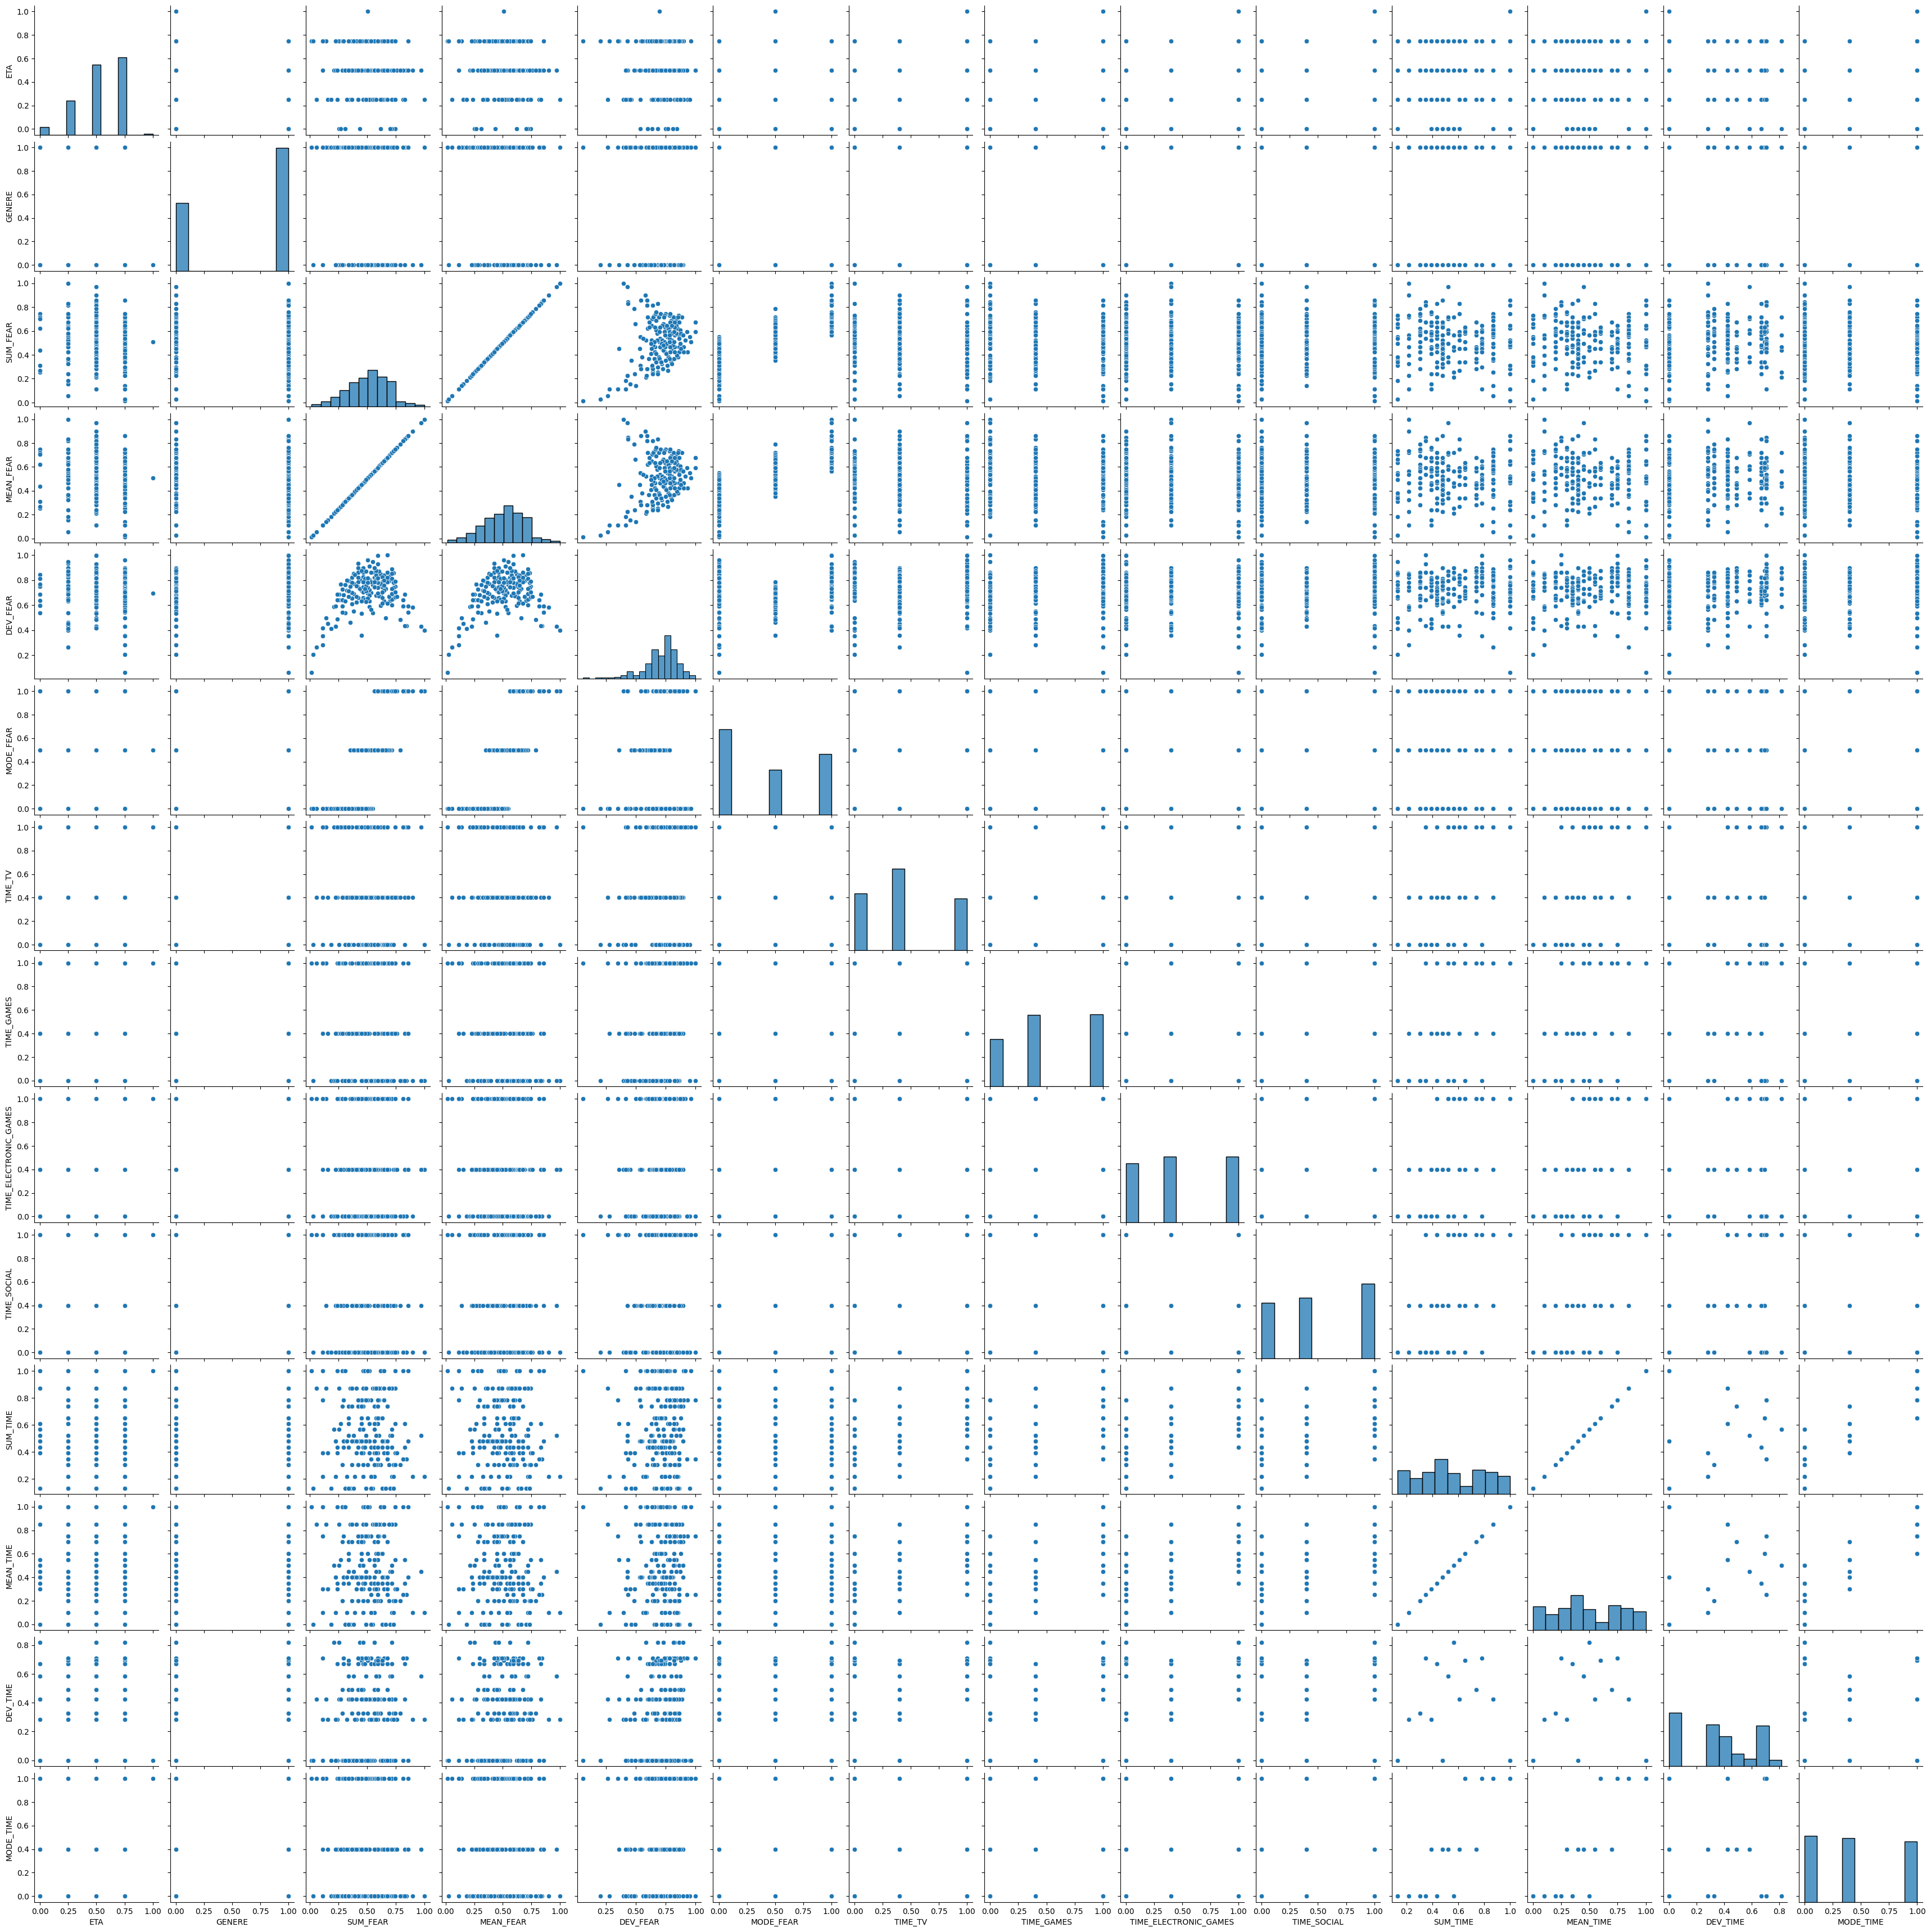

In [220]:
plt.figure(figsize=(20, 20))
sns.pairplot(new_df_test_1)

Ora controlliamo che le variabili seguano una distribuzione normale

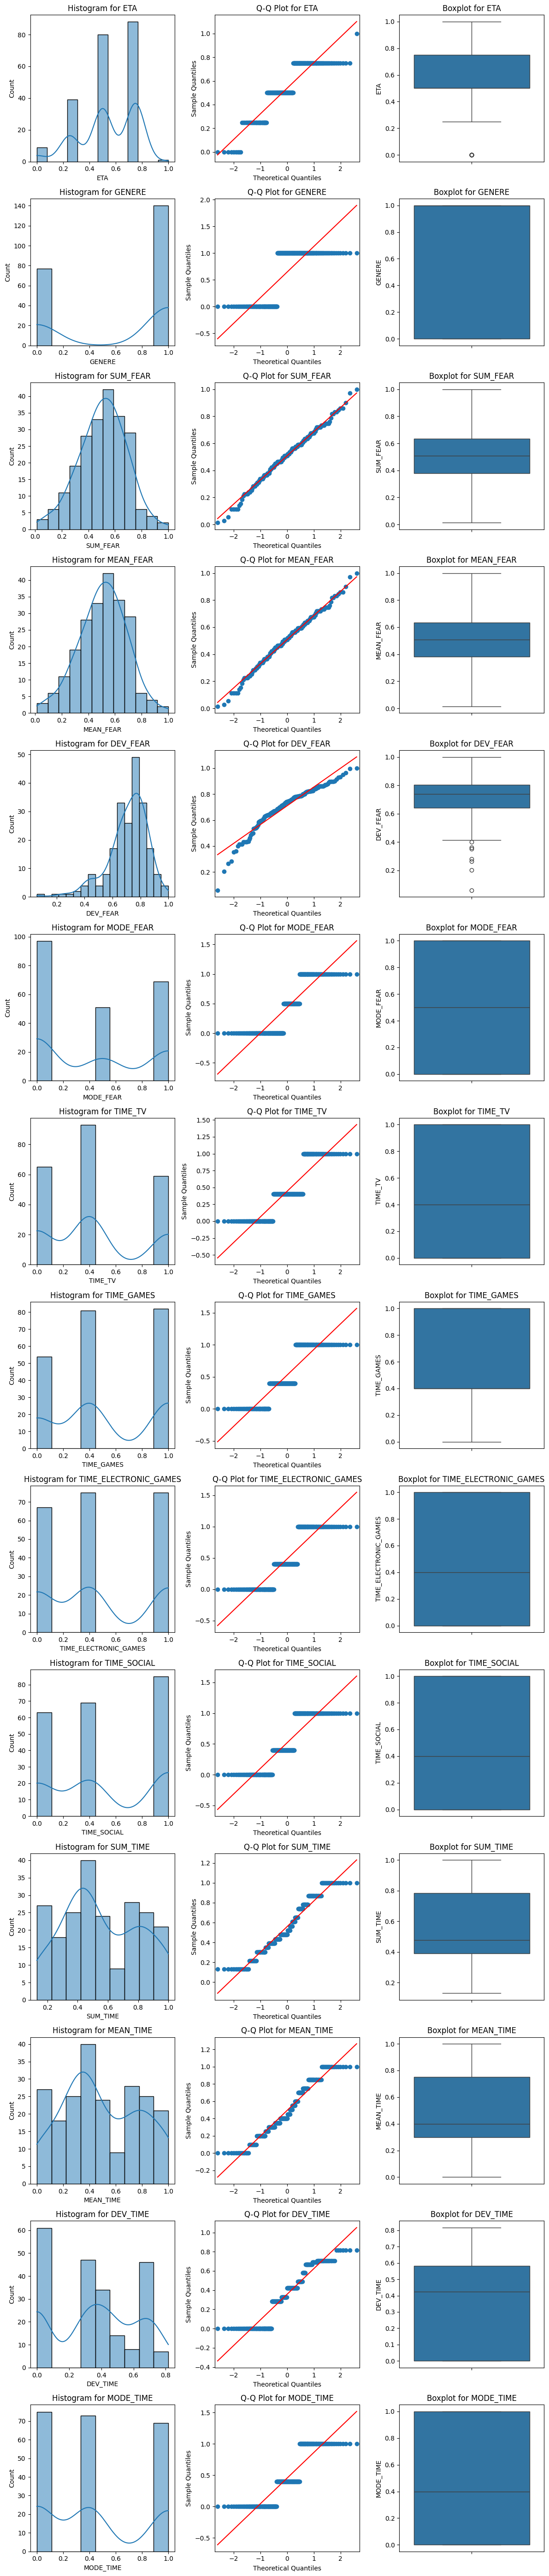

In [221]:
fig, axes = plt.subplots(nrows=len(new_df_test_1.columns), ncols=3, figsize=(12, 4 * len(new_df_test_1.columns)))

for i, column in enumerate(new_df_test_1.columns):
    # Plot Histogram
    sns.histplot(new_df_test_1[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {column}')
    
    # Plot Q-Q Plot
    sm.qqplot(new_df_test_1[column], line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot for {column}')

    # Plot Boxplot
    sns.boxplot(y=new_df_test_1[column], ax=axes[i, 2])
    axes[i, 2].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [222]:
print(f'Shapiro-Wilk test results\n\nCOLUMN{" " * 30}STATISTICS{" " * 10}P-VALUE{" " * 30}RESULT{" " * 30}')

for column in new_df_test_1.columns:
    stat, p_value = shapiro(new_df_test_1[column])
    
    if p_value < 0.05:
        result = f'\033[1;31mDoes not follow a normal distribution\033[0m'
    else:
        result = f'\033[1;32mFollows a normal distribution\033[0m'
    
    print(f'{column:30}{" " * 7}{stat:.4f}{" " * 13}{p_value:.8f}{" " * 13}{result}')


Shapiro-Wilk test results

COLUMN                              STATISTICS          P-VALUE                              RESULT                              
ETA                                  0.8323             0.00000000             Does not follow a normal distribution
GENERE                               0.6050             0.00000000             Does not follow a normal distribution
SUM_FEAR                             0.9937             0.48801112             Follows a normal distribution
MEAN_FEAR                            0.9937             0.48801112             Follows a normal distribution
DEV_FEAR                             0.9294             0.00000001             Does not follow a normal distribution
MODE_FEAR                            0.7556             0.00000000             Does not follow a normal distribution
TIME_TV                              0.7937             0.00000000             Does not follow a normal distribution
TIME_GAMES                           0.7

In [223]:
print(f'Anderson-Darling test results\n\nCOLUMN{" " * 30}STATISTICS{" " * 10}CRITICAL{" " * 30}RESULT{" " * 30}')

for column in new_df_test_1.columns:
    stat = anderson(new_df_test_1[column])
    # print({column}: Statistic={stat.statistic}, Critical Values={stat.critical_values}')
    if stat.statistic > stat.critical_values[2]:
        result = f'\033[1;31mDoes not follow a normal distribution\033[0m'
    else:
        result = f'\033[1;32mFollows a normal distribution\033[0m'
    print(f'{column:30}{" " * 7}{stat.statistic:03.4f}{" " * 15}{stat.critical_values}{" " * 13}{result}')

Anderson-Darling test results

COLUMN                              STATISTICS          CRITICAL                              RESULT                              
ETA                                  15.2584               [0.566 0.644 0.773 0.902 1.073]             Does not follow a normal distribution
GENERE                               43.2272               [0.566 0.644 0.773 0.902 1.073]             Does not follow a normal distribution
SUM_FEAR                             0.4184               [0.566 0.644 0.773 0.902 1.073]             Follows a normal distribution
MEAN_FEAR                            0.4184               [0.566 0.644 0.773 0.902 1.073]             Follows a normal distribution
DEV_FEAR                             3.9751               [0.566 0.644 0.773 0.902 1.073]             Does not follow a normal distribution
MODE_FEAR                            21.8934               [0.566 0.644 0.773 0.902 1.073]             Does not follow a normal distribution
TIME_TV    

Notiamo come in entrambi casi le variabili calcolate sul testo non seguono una distribuzione normale.

Poichè per analizzare la correlazione tra due variabili:
- Person:
- 1) Variabili quantitative: ✅
- 2) Variabili sulla stessa dimensione: ✅
- 3) Normali: ❌
- Spearman e Kendall:
- 1) Variabili quantitative: ✅
- 2) Variabili sulla stessa dimensione: ✅
- 3) Normali (Non necessario)

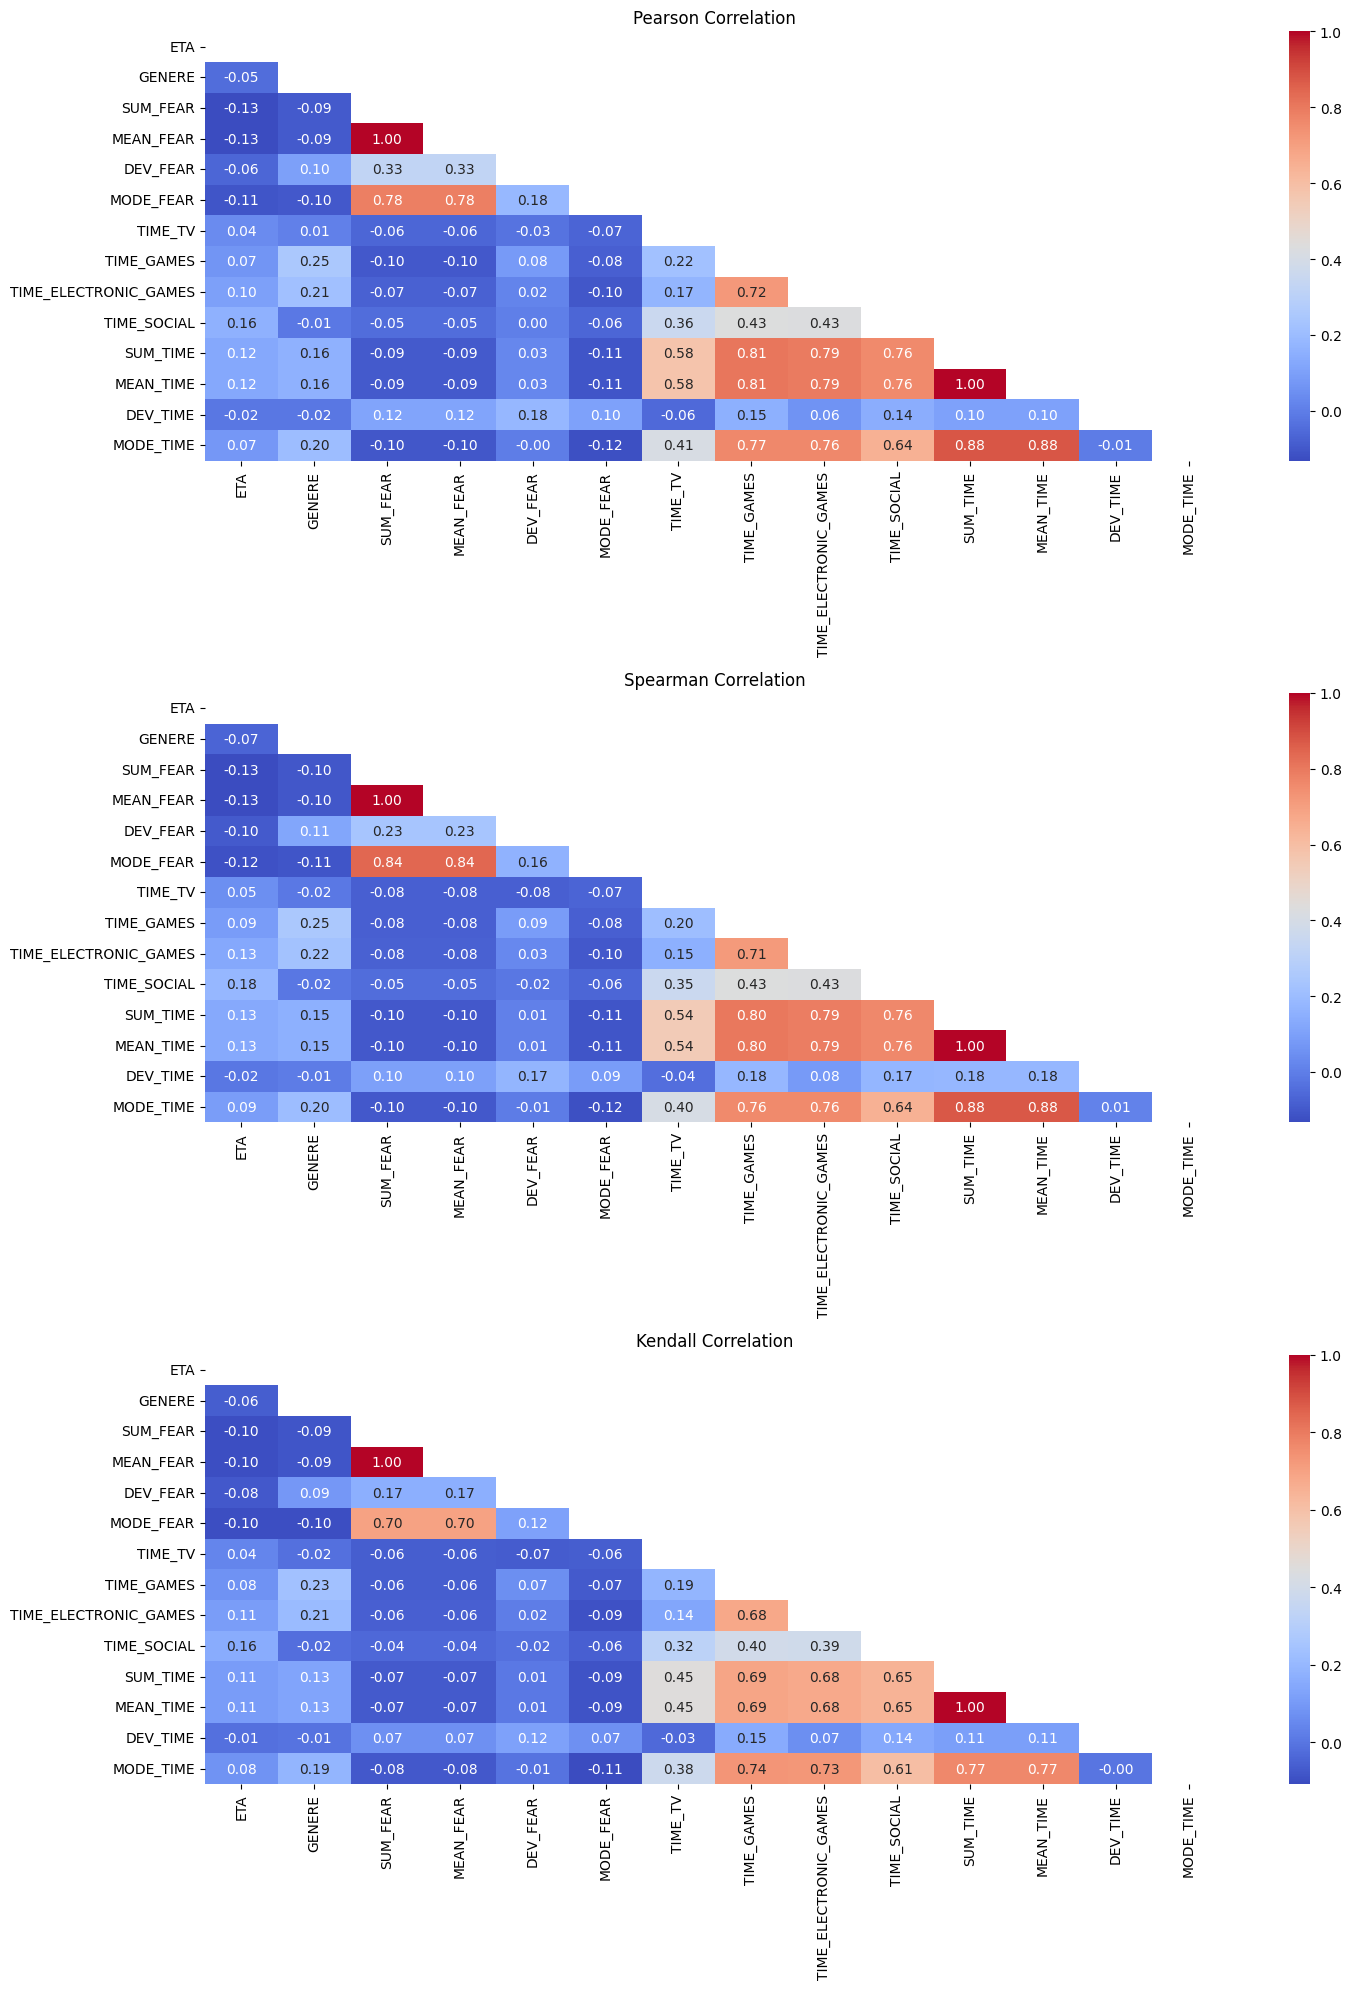

In [225]:
# Calculate correlation matrices
pearson_corr = new_df_test_1.corr(method='pearson')
spearman_corr = new_df_test_1.corr(method='spearman')
kendall_corr = new_df_test_1.corr(method='kendall')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

# Create a figure and axes
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

# Plot heatmaps
sns.heatmap(pearson_corr, mask=mask, ax=ax[0], annot=True, fmt=".2f", cmap='coolwarm')
ax[0].set_title('Pearson Correlation')

sns.heatmap(spearman_corr, mask=mask, ax=ax[1], annot=True, fmt=".2f", cmap='coolwarm')
ax[1].set_title('Spearman Correlation')

sns.heatmap(kendall_corr, mask=mask, ax=ax[2], annot=True, fmt=".2f", cmap='coolwarm')
ax[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

Non è possibile evincere correlazioen tra le variabili di interesse. Rieseguiamo tale procedura considerando come valori nulli la media di quest'ultimi.

## Tentativo 2
1) Sostituiamo le variabili mancanti con valore medio corrispettivo.

In [226]:
new_df_test_2 = new_df.fillna(new_df.mean())
(new_df_test_2.isna().sum()/new_df_test_2.count() * 100).astype('int')

ETA                      0
GENERE                   0
SUM_FEAR                 0
MEAN_FEAR                0
DEV_FEAR                 0
MODE_FEAR                0
TIME_TV                  0
TIME_GAMES               0
TIME_ELECTRONIC_GAMES    0
TIME_SOCIAL              0
SUM_TIME                 0
MEAN_TIME                0
DEV_TIME                 0
MODE_TIME                0
dtype: int32

<Figure size 2000x2000 with 0 Axes>

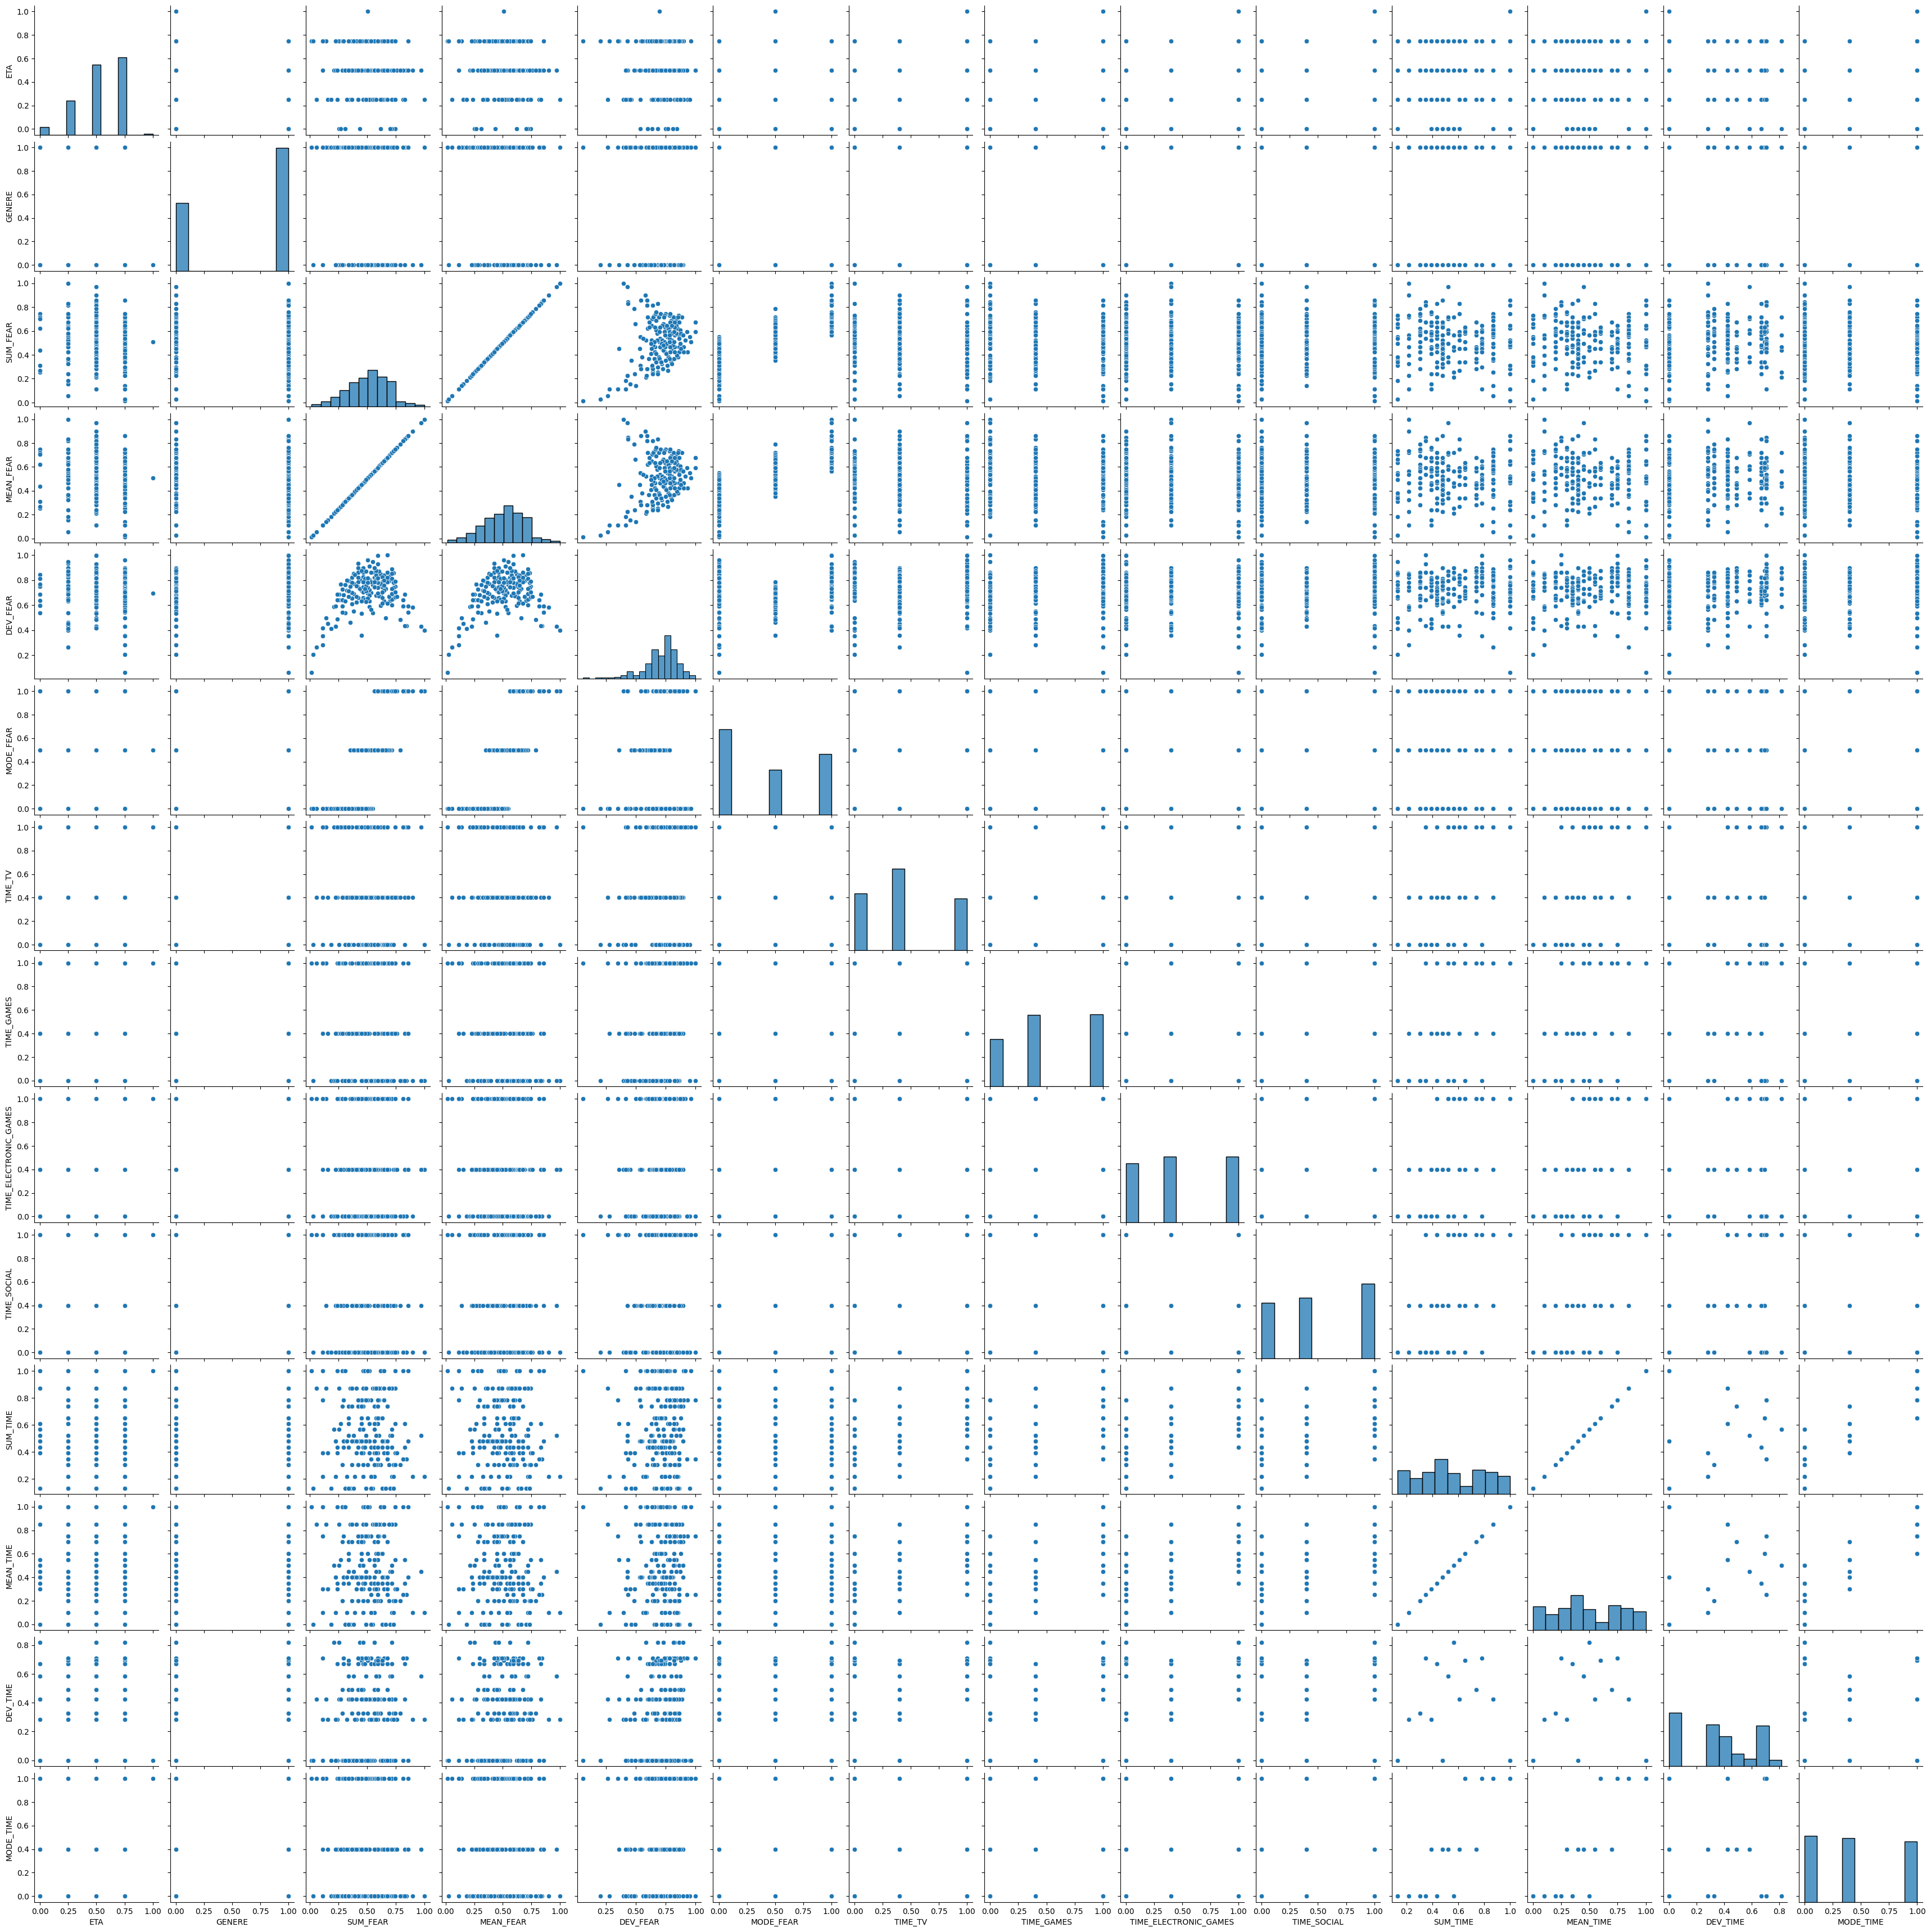

In [227]:
plt.figure(figsize=(20, 20))
sns.pairplot(new_df_test_1)

Ora controlliamo che le variabili seguano una distribuzione normale

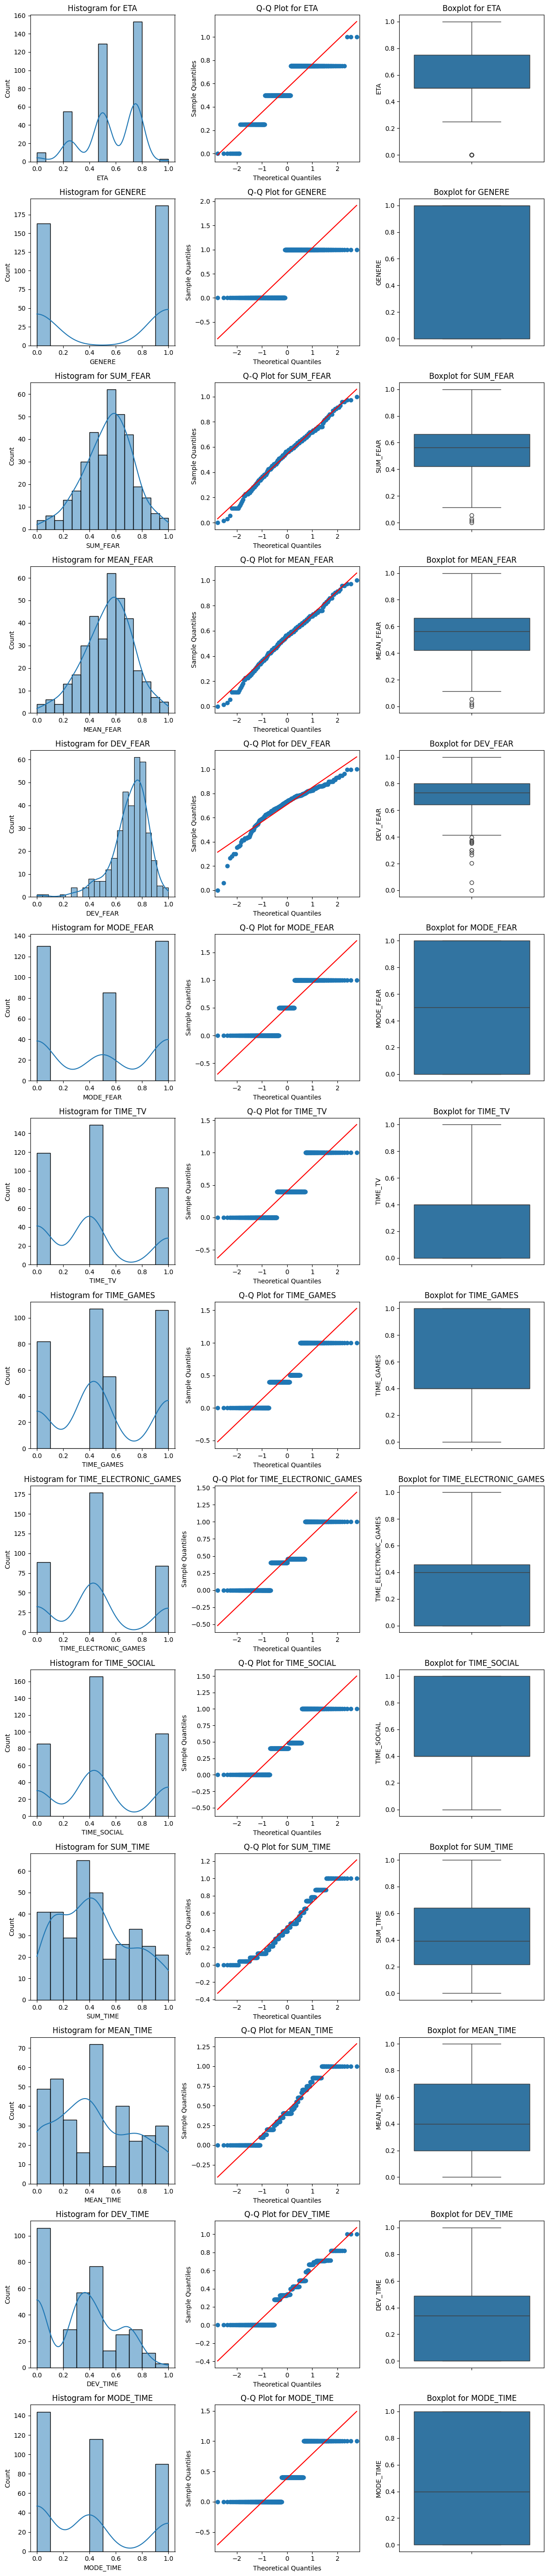

In [231]:
fig, axes = plt.subplots(nrows=len(new_df_test_2.columns), ncols=3, figsize=(12, 4 * len(new_df_test_2.columns)))

for i, column in enumerate(new_df_test_2.columns):
    # Plot Histogram
    sns.histplot(new_df_test_2[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {column}')
    
    # Plot Q-Q Plot
    sm.qqplot(new_df_test_2[column], line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot for {column}')

    # Plot Boxplot
    sns.boxplot(y=new_df_test_2[column], ax=axes[i, 2])
    axes[i, 2].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [232]:
print(f'Shapiro-Wilk test results\n\nCOLUMN{" " * 30}STATISTICS{" " * 10}P-VALUE{" " * 30}RESULT{" " * 30}')

for column in new_df_test_2.columns:
    stat, p_value = shapiro(new_df_test_2[column])
    
    if p_value < 0.05:
        result = f'\033[1;31mDoes not follow a normal distribution\033[0m'
    else:
        result = f'\033[1;32mFollows a normal distribution\033[0m'
    
    print(f'{column:30}{" " * 7}{stat:.4f}{" " * 13}{p_value:.8f}{" " * 13}{result}')


Shapiro-Wilk test results

COLUMN                              STATISTICS          P-VALUE                              RESULT                              
ETA                                  0.8243             0.00000000             Does not follow a normal distribution
GENERE                               0.6348             0.00000000             Does not follow a normal distribution
SUM_FEAR                             0.9907             0.02617926             Does not follow a normal distribution
MEAN_FEAR                            0.9907             0.02617926             Does not follow a normal distribution
DEV_FEAR                             0.9226             0.00000000             Does not follow a normal distribution
MODE_FEAR                            0.7639             0.00000000             Does not follow a normal distribution
TIME_TV                              0.7878             0.00000000             Does not follow a normal distribution
TIME_GAMES              

In [233]:
print(f'Anderson-Darling test results\n\nCOLUMN{" " * 30}STATISTICS{" " * 10}CRITICAL{" " * 30}RESULT{" " * 30}')

for column in new_df_test_2.columns:
    stat = anderson(new_df_test_2[column])
    # print({column}: Statistic={stat.statistic}, Critical Values={stat.critical_values}')
    if stat.statistic > stat.critical_values[2]:
        result = f'\033[1;31mDoes not follow a normal distribution\033[0m'
    else:
        result = f'\033[1;32mFollows a normal distribution\033[0m'
    print(f'{column:30}{" " * 7}{stat.statistic:03.4f}{" " * 15}{stat.critical_values}{" " * 13}{result}')

Anderson-Darling test results

COLUMN                              STATISTICS          CRITICAL                              RESULT                              
ETA                                  26.8484               [0.57  0.649 0.778 0.908 1.08 ]             Does not follow a normal distribution
GENERE                               63.1047               [0.57  0.649 0.778 0.908 1.08 ]             Does not follow a normal distribution
SUM_FEAR                             0.9388               [0.57  0.649 0.778 0.908 1.08 ]             Does not follow a normal distribution
MEAN_FEAR                            0.9388               [0.57  0.649 0.778 0.908 1.08 ]             Does not follow a normal distribution
DEV_FEAR                             6.2870               [0.57  0.649 0.778 0.908 1.08 ]             Does not follow a normal distribution
MODE_FEAR                            33.6613               [0.57  0.649 0.778 0.908 1.08 ]             Does not follow a normal distribu

Calcoliamo nuovamente l'indice di correlazione

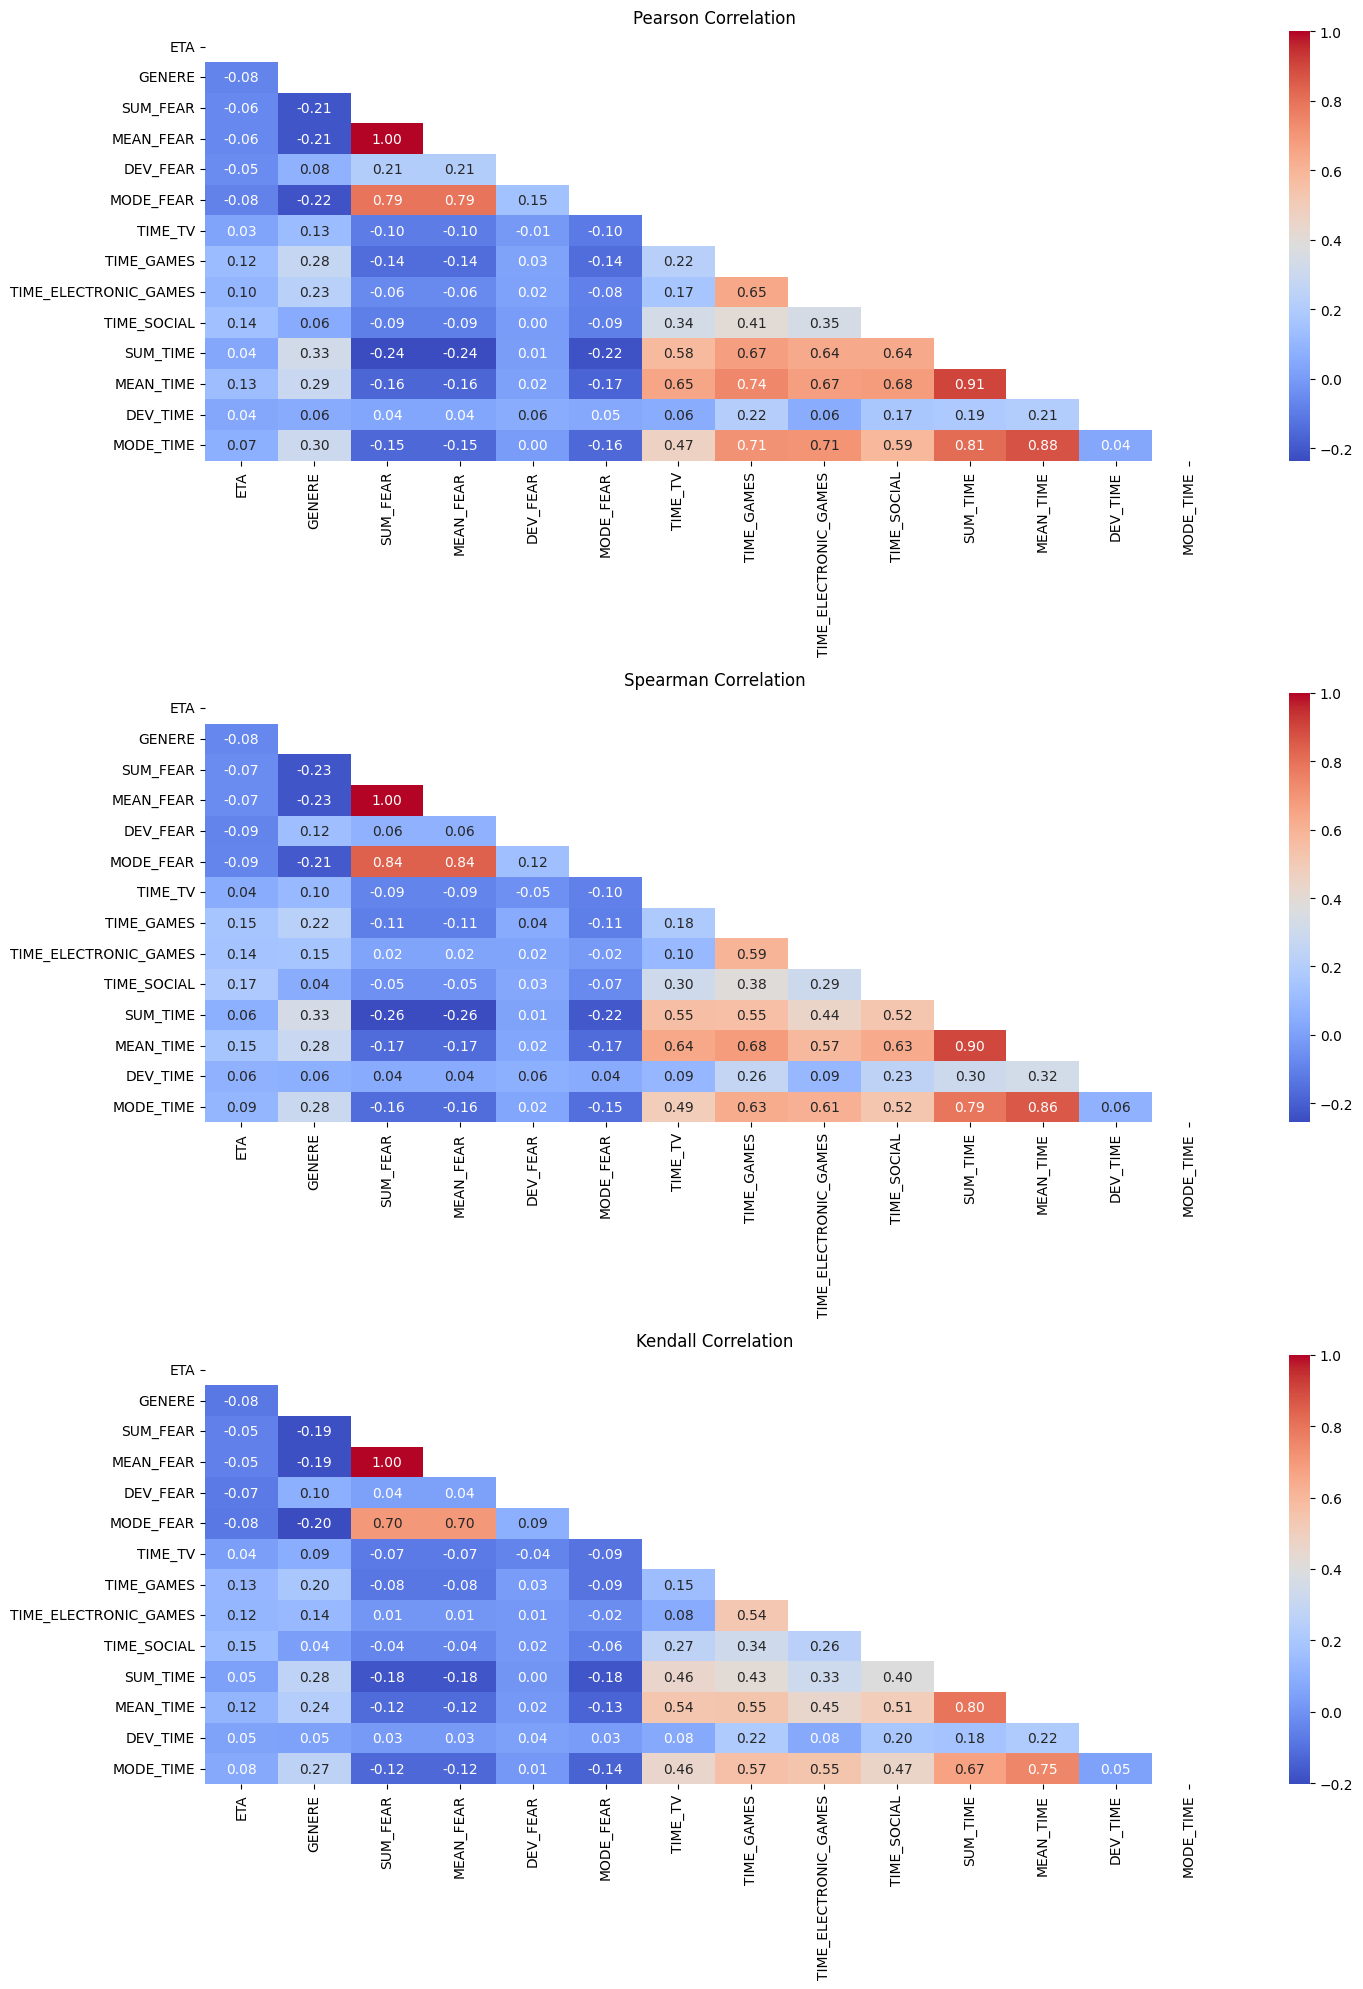

In [235]:
# Calculate correlation matrices
pearson_corr = new_df_test_2.corr(method='pearson')
spearman_corr = new_df_test_2.corr(method='spearman')
kendall_corr = new_df_test_2.corr(method='kendall')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

# Create a figure and axes
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

# Plot heatmaps
sns.heatmap(pearson_corr, mask=mask, ax=ax[0], annot=True, fmt=".2f", cmap='coolwarm')
ax[0].set_title('Pearson Correlation')

sns.heatmap(spearman_corr, mask=mask, ax=ax[1], annot=True, fmt=".2f", cmap='coolwarm')
ax[1].set_title('Spearman Correlation')

sns.heatmap(kendall_corr, mask=mask, ax=ax[2], annot=True, fmt=".2f", cmap='coolwarm')
ax[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()